# Support Vector Machines - SVM

# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the 
dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in 
the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all 
patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the 
number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# 1. Import Libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Diabetes.csv")

# 2. Check dimension of dataset

In [2]:
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Check distribution of dependent variable, Outcome and plot it

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df["Glucose"].replace(0, df["Glucose"].median(), inplace = True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 4. Out of 768 data points, 500 are labeled as 0 and 268 as 1.
Outcome 0 means No diabetes, outcome 1 means diabetes, Give a countplot

In [9]:
df["Glucose"].replace(0, df["Glucose"].median(), inplace = True)
df["BloodPressure"].replace(0, df["BloodPressure"].median(), inplace = True)
df["SkinThickness"].replace(0, df["SkinThickness"].median(), inplace = True)
df["Insulin"].replace(0, df["Insulin"].median(), inplace = True)
df["BMI"].replace(0, df["BMI"].median(), inplace = True)

# 5. Check data distribution using summary statistics and provide your findings(Insights)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. Do correlation analysis and bivariate viualization with Insights

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


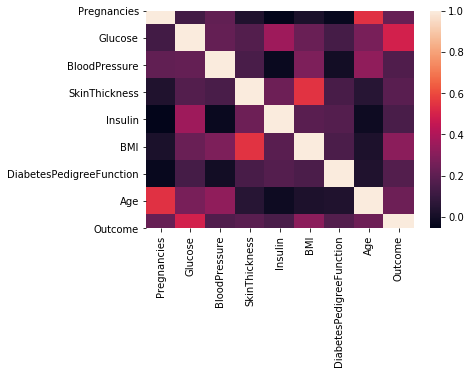

In [14]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr())

# 7. Plot a scatter Matrix

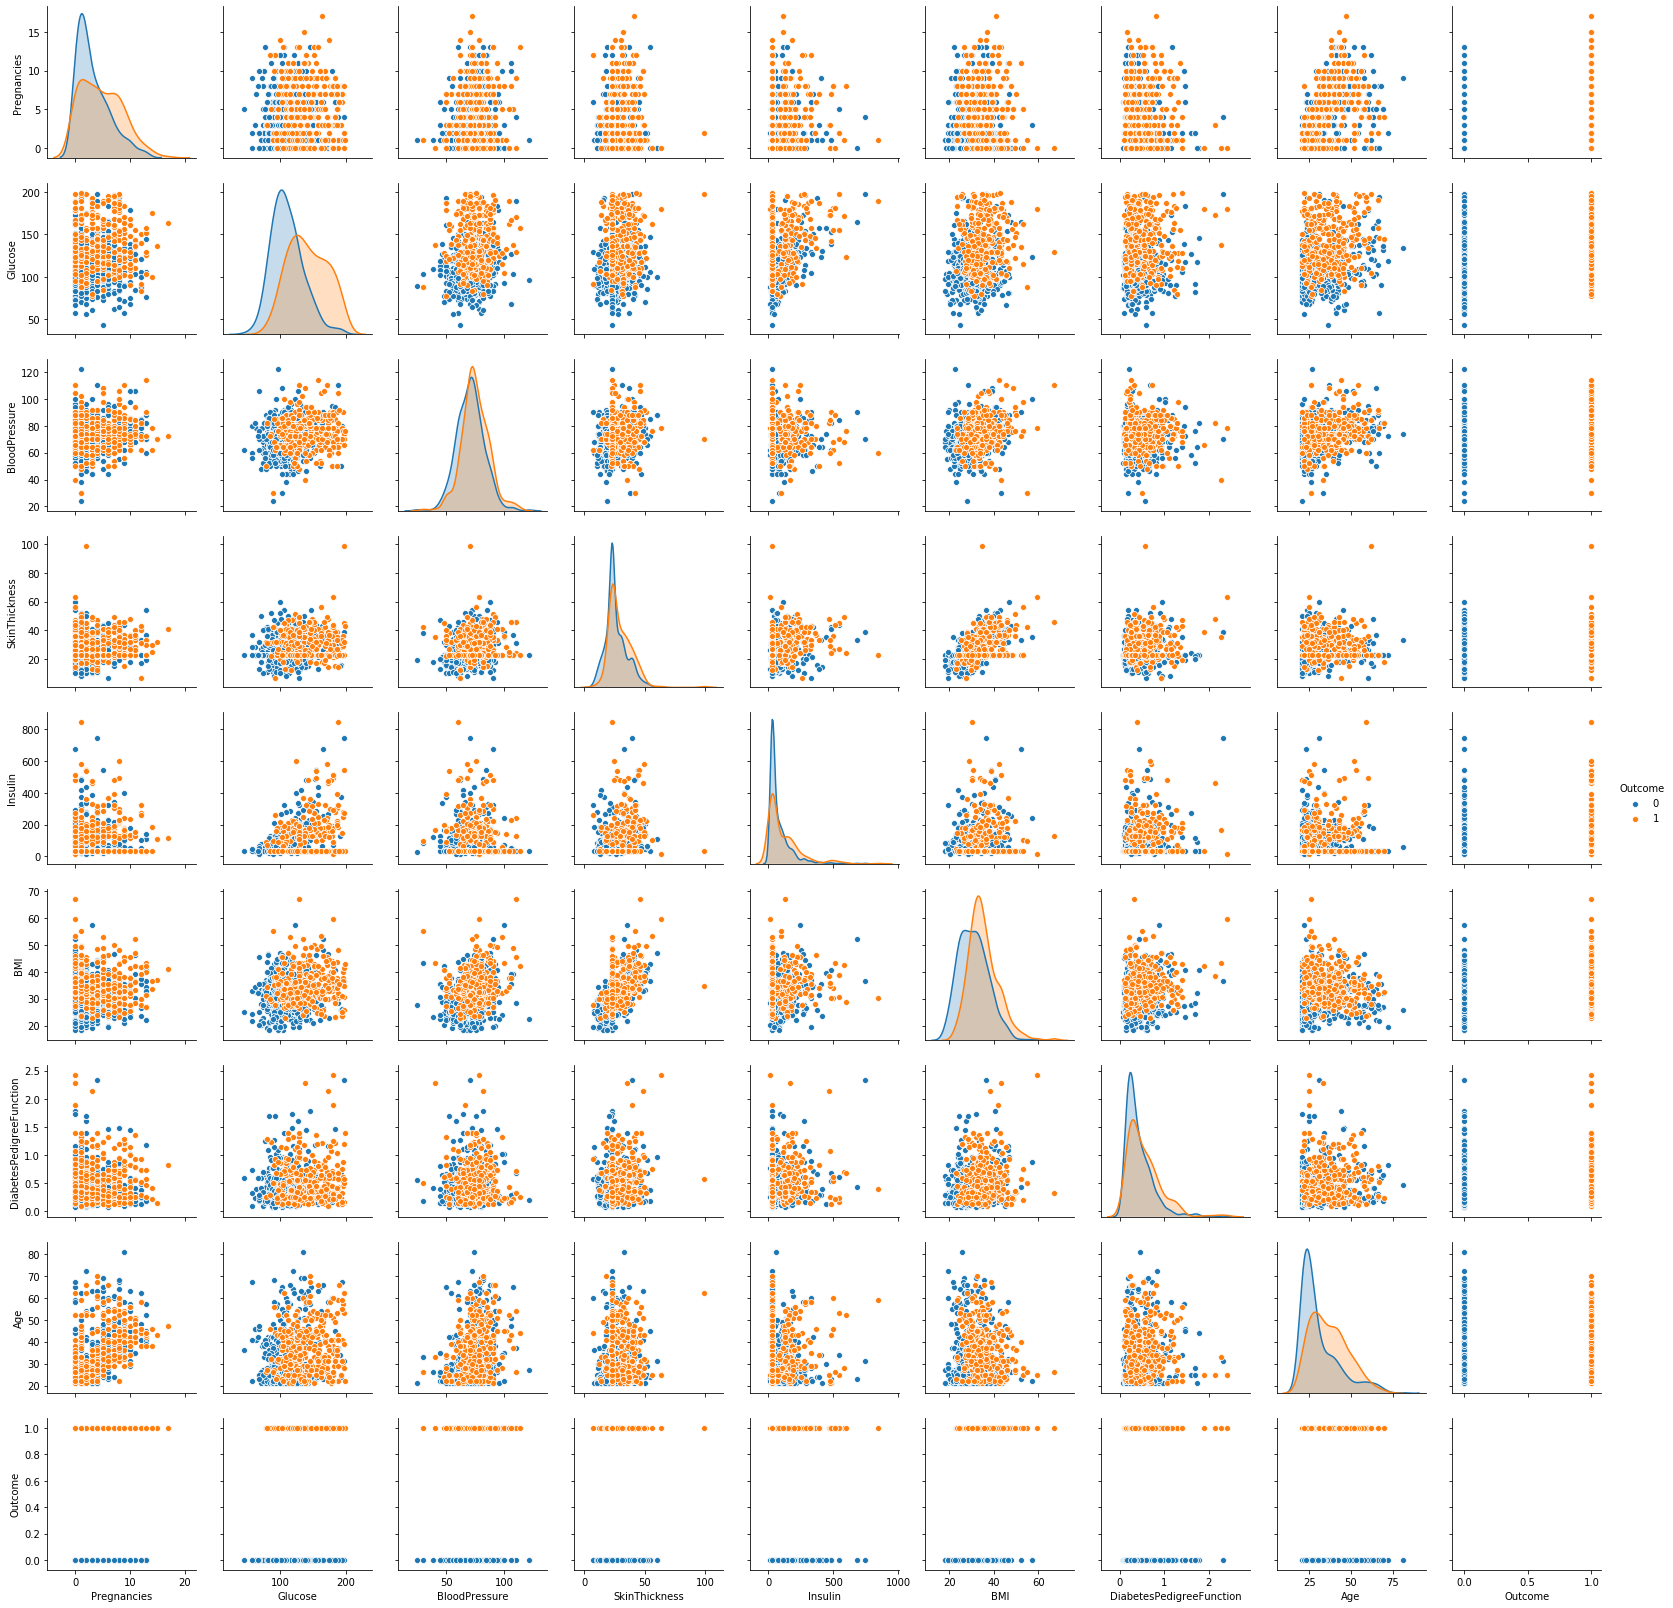

In [19]:
sns.pairplot(df, hue = "Outcome")

# 8. Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable

In [59]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify=y)

# 9. Train Support Vector Machine Model

In [60]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC(gamma = 0.025, C = .1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.6493506493506493

# 10. Scale the data points using MinMaxScaler

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

model = svm.SVC(gamma = 0.025, C = .1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.6493506493506493

# 11. Fit SVM Model on Scale data and give your observation

In [62]:
model = svm.SVC(gamma = .0025, C = 10000)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7662337662337663

# 12. Try improving the model accuracy using C=1000

In [63]:
y_train_predict = model.predict(X_train)
accuracy_score(y_train, y_train_predict)

0.7653631284916201

# Here, increasing C allows us to improve the model, resulting in 81.2% train set accuracy.